## COCO Entities Demo

#### Load json file

In [1]:
import json
with open('coco_entities_release.json', 'r') as fp:  
    coco_entities = json.load(fp)

#### Select a sample image-caption pair

In [2]:
name_img = 'COCO_train2014_000000264169.jpg'
id_img = str(int(name_img.split('_')[-1].split('.')[0]))
caption = 'a woman in sunglasses riding a horse on a beach'
print('image id:', id_img)
print('caption:', caption)

image id: 264169
caption: a woman in sunglasses riding a horse on a beach


#### Read annotations

In [3]:
print(caption.split(' '))
print(coco_entities[id_img][caption]['det_sequences'])

['a', 'woman', 'in', 'sunglasses', 'riding', 'a', 'horse', 'on', 'a', 'beach']
['woman', 'woman', None, 'sunglasses', None, 'horse', 'horse', None, 'beach', 'beach']


In [4]:
noun_chunks = coco_entities[id_img][caption]['noun_chunks']
print('caption:', caption)
print('noun chunks:')
for i, nc in enumerate(noun_chunks):
    print('- %s (det. class: %s)' % (nc[0], nc[1]))

caption: a woman in sunglasses riding a horse on a beach
noun chunks:
- a woman (det. class: woman)
- sunglasses (det. class: sunglasses)
- a horse (det. class: horse)
- a beach (det. class: beach)


#### Restore detection feature vector for a sample detection ID

In [5]:
import h5py
detections_path = 'datasets/coco/coco_detections.hdf5'  # detection file path
f = h5py.File(detections_path, 'r')
det_features = f['%s_features' % id_img][()]

det_classes = coco_entities[id_img][caption]['detections']
for cls in det_classes:
    print('%s detections:' % cls)
    for det in det_classes[cls]:
        det_id = det[0]
        bbox = det[1]
        features = det_features[det_id]
        print('- det. id: %s, bbox: %s, feat. shape: %s' % (det_id, bbox, features.shape))

sunglasses detections:
- det. id: 38, bbox: [428.93505859375, 97.31204223632812, 460.8602600097656, 118.52891540527344], feat. shape: (2048,)
horse detections:
- det. id: 0, bbox: [261.8229064941406, 186.00193786621094, 639.07666015625, 426.288330078125], feat. shape: (2048,)
- det. id: 33, bbox: [196.29029846191406, 228.68658447265625, 416.9248962402344, 416.4823303222656], feat. shape: (2048,)
beach detections:
- det. id: 1, bbox: [0.0, 148.80857849121094, 345.5086669921875, 426.288330078125], feat. shape: (2048,)
woman detections:
- det. id: 9, bbox: [367.285888671875, 176.14706420898438, 493.6888427734375, 394.7856140136719], feat. shape: (2048,)
- det. id: 12, bbox: [356.6156921386719, 53.02366256713867, 532.8366088867188, 297.7132873535156], feat. shape: (2048,)
- det. id: 18, bbox: [338.1186828613281, 125.9439697265625, 529.4459838867188, 364.9779357910156], feat. shape: (2048,)


#### Visualize detections

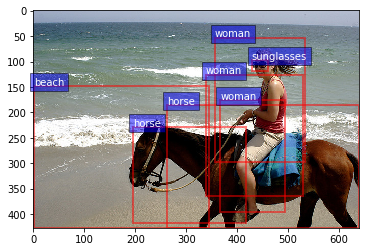

In [7]:
import matplotlib.pyplot as plt
import cv2

img = cv2.imread('samples/%s' % name_img)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

for cls in coco_entities[id_img][caption]['detections']:
    for det in coco_entities[id_img][caption]['detections'][cls]:
        bbox = det[1]
        if bbox[0] == 0:
            bbox[0] = 1
        if bbox[1] == 0:
            bbox[1] = 1
        plt.gca().add_patch(plt.Rectangle((bbox[0], bbox[1]), bbox[2] - bbox[0], bbox[3] - bbox[1], 
                                          fill=False, edgecolor='red', linewidth=2, alpha=0.5))
        plt.gca().text(bbox[0], bbox[1] - 2, '%s' % (cls), bbox=dict(facecolor='blue', alpha=0.5), 
                       fontsize=10, color='white')